In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
tf.random.set_seed(42)

In [3]:
# Load data file and separate into features and classification labels
data = np.loadtxt("./cleaned_processed.cleveland.data", delimiter=",")
x = data[:,:-1]
y = np.array(data[:,-1], dtype=np.int)
print(x.shape)

(297, 13)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
def make_mlp(num_features):
    
    regularizer = tf.keras.regularizers.l2(l=0.01)
    
    model = tf.keras.Sequential()
    model.add(layers.Dense(
        100,
        activation='sigmoid', 
        input_shape=(num_features,), 
        activity_regularizer=regularizer
    ))
    model.add(layers.Dense(
        100,
        activation='sigmoid', 
        activity_regularizer=regularizer
    ))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

In [16]:
classifier = make_mlp(x.shape[1])
classifier.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               1400      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 11,601
Trainable params: 11,601
Non-trainable params: 0
_________________________________________________________________


In [17]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

In [18]:
history = classifier.fit(X_train, y_train, validation_split=0.2, epochs=200, callbacks=[early_stop])

Epoch 1/200
6/6 [==============================] - 0s 20ms/step - loss: 1.5792 - accuracy: 0.5026 - val_loss: 1.5072 - val_accuracy: 0.3333
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 1.4314 - accuracy: 0.5344 - val_loss: 1.3857 - val_accuracy: 0.6875
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 1.3875 - accuracy: 0.5079 - val_loss: 1.3289 - val_accuracy: 0.6875
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 1.3276 - accuracy: 0.5503 - val_loss: 1.2991 - val_accuracy: 0.5625
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 1.2921 - accuracy: 0.5344 - val_loss: 1.2877 - val_accuracy: 0.4167
Epoch 6/200
6/6 [==============================] - 0s 6ms/step - loss: 1.2448 - accuracy: 0.5820 - val_loss: 1.2507 - val_accuracy: 0.4167
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 1.2199 - accuracy: 0.5979 - val_loss: 1.2310 - val_accuracy: 0.4167
Epoch 8/200
6/6 [=========

6/6 [==============================] - 0s 5ms/step - loss: 0.7354 - accuracy: 0.7884 - val_loss: 0.8568 - val_accuracy: 0.6875
Epoch 60/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7349 - accuracy: 0.7778 - val_loss: 0.8226 - val_accuracy: 0.7500
Epoch 61/200
6/6 [==============================] - 0s 6ms/step - loss: 0.7473 - accuracy: 0.7672 - val_loss: 0.8564 - val_accuracy: 0.6667
Epoch 62/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7333 - accuracy: 0.7778 - val_loss: 0.8203 - val_accuracy: 0.7083
Epoch 63/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7327 - accuracy: 0.7778 - val_loss: 0.8421 - val_accuracy: 0.7083
Epoch 64/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7297 - accuracy: 0.7831 - val_loss: 0.8450 - val_accuracy: 0.6875
Epoch 65/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7159 - accuracy: 0.7831 - val_loss: 0.8191 - val_accuracy: 0.7500
Epoch 66/200
6/6 [===============

6/6 [==============================] - 0s 5ms/step - loss: 0.6031 - accuracy: 0.8466 - val_loss: 0.7811 - val_accuracy: 0.7917
Epoch 118/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6148 - accuracy: 0.8519 - val_loss: 0.7945 - val_accuracy: 0.7708
Epoch 119/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6162 - accuracy: 0.8360 - val_loss: 0.7647 - val_accuracy: 0.7917
Epoch 120/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6161 - accuracy: 0.8519 - val_loss: 0.8039 - val_accuracy: 0.7500
Epoch 121/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6047 - accuracy: 0.8519 - val_loss: 0.7625 - val_accuracy: 0.8333
Epoch 122/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6098 - accuracy: 0.8466 - val_loss: 0.7946 - val_accuracy: 0.7500
Epoch 123/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6132 - accuracy: 0.8730 - val_loss: 0.7787 - val_accuracy: 0.8333
Epoch 124/200
6/6 [========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


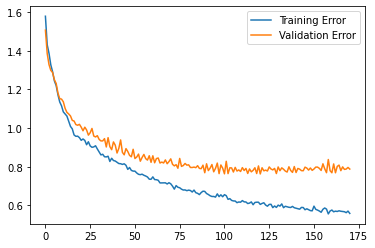

In [19]:
print(history.history.keys())
plt.plot(history.history['loss'], label='Training Error')
plt.plot(history.history['val_loss'], label="Validation Error")
plt.legend()

In [20]:
classifier.evaluate(X_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.5908 - accuracy: 0.8667


[0.5907920002937317, 0.8666666746139526]